In [139]:
# Generates the Lorenz 1963 and the Lorenz 1996 chaotic systems.

import sys

import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats

from matplotlib import pyplot as plt

# Functions

In [196]:
# Runge Kutta 4.
def RK_4(func, x_0, N = 1e4, h = 0.01):

    N = int(N)

    # Generate time array.
    t = np.arange(0., N * h, h)
    # Weights for each Runge Kutta steps.
    w = np.array( [1, 1, 1, 2] )
    # Runge Kutta steps array.
    X = np.array( [ [0.] * (w.shape[0] + 1) ] * x_0.shape[0] )
    # Results array.
    x = np.array( [ ( [i] + [0.0] * (N - 1) ) for i in x_0 ] )

    # Iterate for every time step.
    for i in range(N - 1):
        # Iterate for each Runge Kutta step.
        for j in range(w.shape[0]):
            # Generate the input variable for the Runge Kutta step.
            x_t = np.array( [ x[k, i] + h * X[k, j] * w[j] / 2
                for k in range( x_0.shape[0] ) ] )
            # Calculate the Runge Kutta step.
            X[:, j + 1] = func(x_t)

        # Generate the result.
        x[:, i + 1] = ( x[:, i] + h / 6 * ( X[:, 1]
            + 2 * X[:, 2] + 2 * X[:, 3] + X[:, 4] ) )

    return x, t

In [147]:
# Lorenz 1963.
def Lorenz_63(X, s = 10., r = 28., b = 8/3):
    
    dx_dt = s * ( X[1] - X[0] )
    dy_dt = X[0] * ( r - X[2] ) - X[1]
    dz_dt = X[0] * X[1] - b * X[2]

    return dx_dt, dy_dt, dz_dt

# Lorenz 1996.
def Lorenz_96(X, s = 10., F = 8.):

    dX_dt = ( np.roll(X, -1) - np.roll(X, 2) ) * np.roll(X, 1) - X + F

    return dX_dt

In [227]:

# Time series for each variable.
def time_Lorenz(x, t, t_0 = 0):
    
    t_0 = int(t_0)
    x = x[:, t_0:]
    t = t[t_0:]

    fig, axes = plt.subplots( x.shape[0] )
    fig.set_facecolor("w")
    if x.shape[0] > 4: h = x.shape[0]
    else: h = 2 * x.shape[0]
    fig.set_size_inches(10, h)
    fig.set_dpi(150)

    for i in range( x.shape[0] ):
        axes[i].plot(t, x[i])
        axes[i].set_xlim(t[0], t[-1])

# Time series for each variable.
def compare_time(X, t, t_0 = 2e3):

    t_0 = int(t_0)
    X = [ X[0][:, t_0:], X[1][:, t_0:] ]
    t = t[t_0:]

    fig, axes = plt.subplots( X[0].shape[0] )
    fig.set_facecolor("w")
    if X[0].shape[0] > 4: h = X[0].shape[0]
    else: h = 2 * X[0].shape[0]
    fig.set_size_inches(10, h)
    fig.set_dpi(150)

    for i in range( X[0].shape[0] ):
        axes[i].plot(t, X[0][i])
        axes[i].plot(t, X[1][i])
        axes[i].set_xlim(t[0], t[-1])

# Space plot of the first three variables.
def space_Lorenz(x, t):

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    fig.set_facecolor("w")
    fig.set_size_inches(10, 8)
    fig.set_dpi(150)

    ax.plot(x[0], x[1], x[2])

# Plot a Lorenz system.
def plot_Lorenz(x, t):

    # Time series for each variable.
    time_Lorenz(x, t)
    # Space plot of the first three variables.
    space_Lorenz(x, t)

In [223]:
# Canadian Quick Covariance method.
def Canadian_cov(x, s = 1):

    # Covariance matrix
    a = np.cov( x[:, ::1] )
    vmin = np.amin(a)
    vmax = np.amax(a)

    # Plot
    fig, ax = plt.subplots()
    fig.set_facecolor("w")
    fig.set_size_inches(5, 5)
    fig.set_dpi(150)

    ax = sns.heatmap( a, vmin = vmin, vmax = vmax, center = 0, 
        cmap = sns.diverging_palette(20, 220, n = 200), square = True )

# Canadian Quick Correlation method.
def Canadian_corr(x, s = 1):

    # Correlation matrix
    a = np.corrcoef( x[:, ::1] )
    vmin = -1
    vmax = -vmin

    # Plot
    fig, ax = plt.subplots()
    fig.set_facecolor("w")
    fig.set_size_inches(5, 5)
    fig.set_dpi(150)

    ax = sns.heatmap( a, vmin = vmin, vmax = vmax, center = 0,
        cmap = sns.diverging_palette(20, 220, n=200), square = True )

In [216]:
# Simulate observations
def gen_obs(x, s = 1):
    return stats.norm.rvs(loc = x, scale = s)

# Code

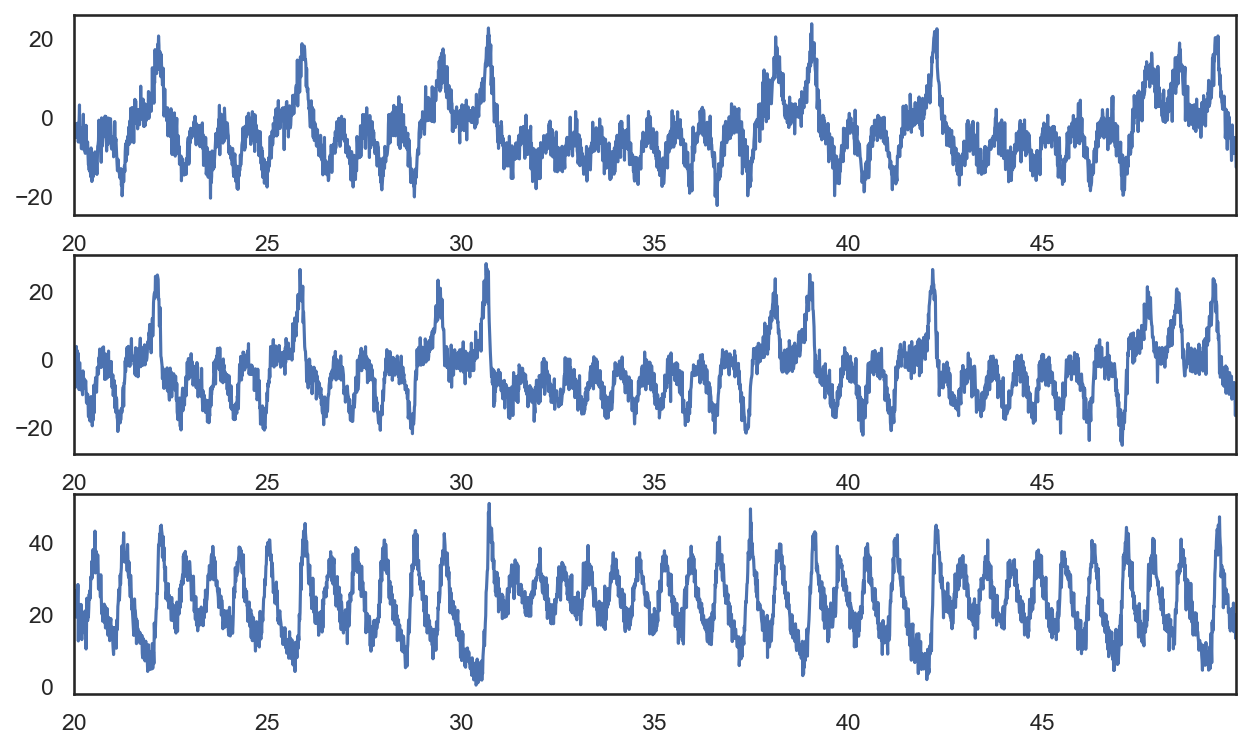

In [229]:
# Observations

# Number of variables.
M = 3
# Number of time steps.
N = 5e3
# Initial conditions.
x_0 = np.array( [0.01] * M )

# Solve by Runge Kutta 4.
x, t = RK_4(Lorenz_63, x_0, N = N )

# Simulate observations.
x = gen_obs(x, s = 2.5)

time_Lorenz(x, t, t_0 = 2e3)

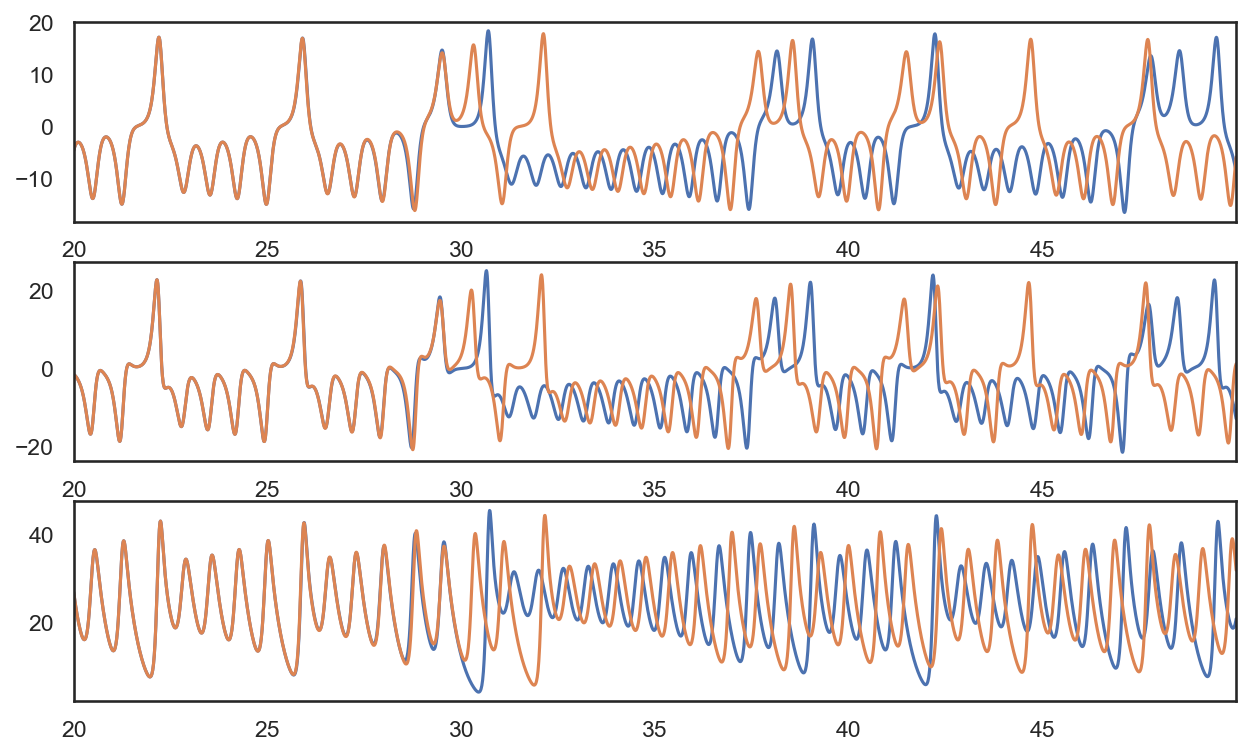

In [214]:
# Lorenz 1963 chaos

# perturbation
#p = 10 ** sys.float_info.min_10_exp
p = 1e-5

# Number of variables.
M = 3
# Number of time steps.
N = 5e3
# Initial conditions.
x_0 = np.array( [0.01] * M )

# Solve by Runge Kutta 4.
x_1, t = RK_4(Lorenz_63, x_0, N = N )

# Initial conditions.
x_0[0] += p

# Solve by Runge Kutta 4.
x_2, t = RK_4(Lorenz_63, x_0, N = N )

compare_time([x_1, x_2], t)

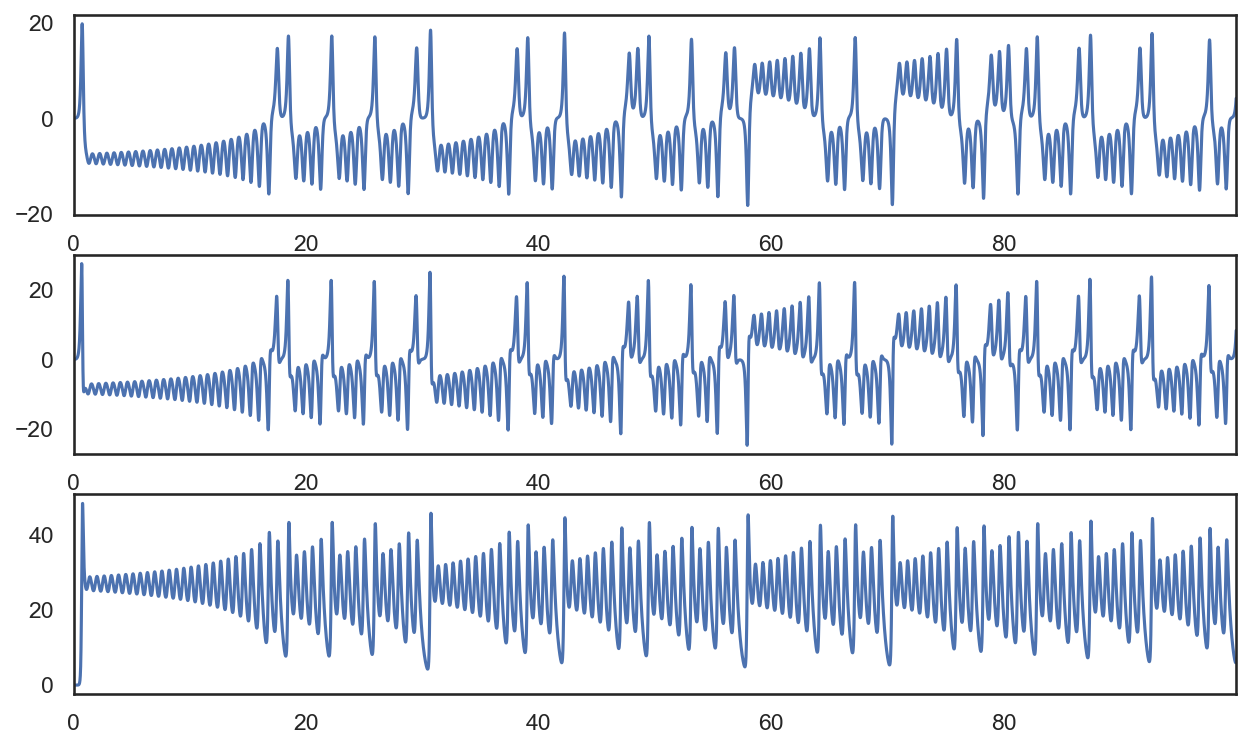

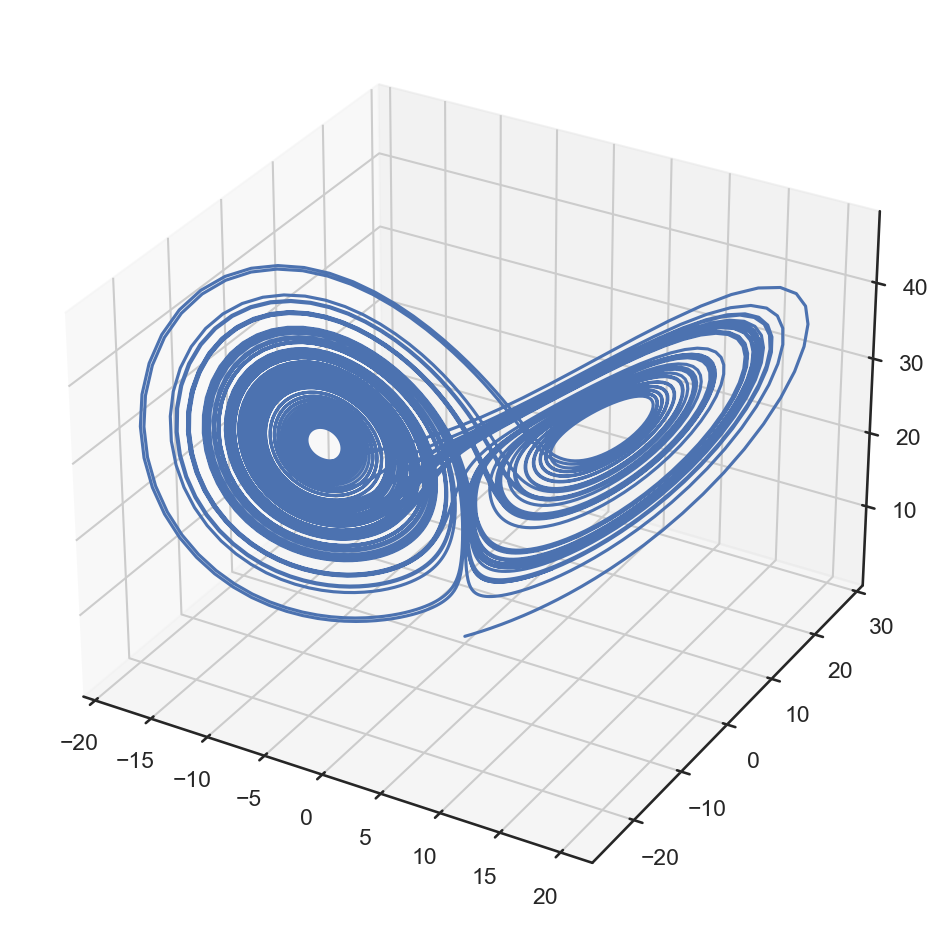

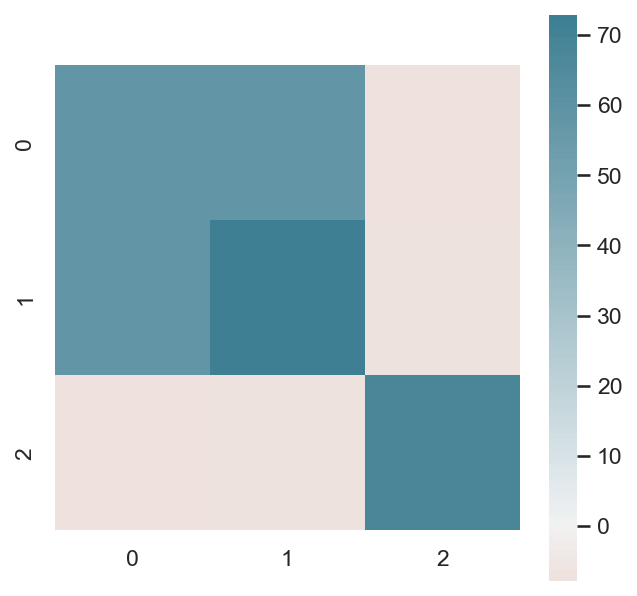

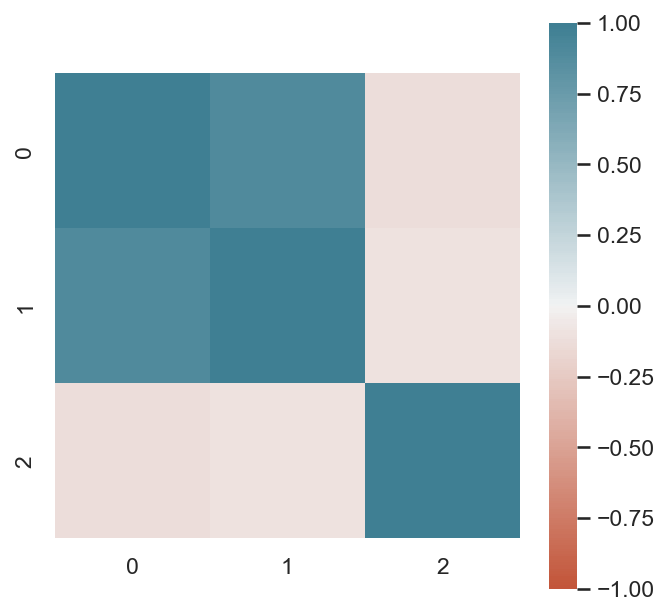

In [148]:
# Lorenz 1963

# Number of variables.
M = 3
# Initial conditions.
x_0 = np.array( [0.01] * M )

# Solve by Runge Kutta 4.
x, t = RK_4(Lorenz_63, x_0)

# Plot
plot_Lorenz(x, t)

# Canadian Quick Covariance method.
Canadian_cov(x)
Canadian_corr(x)

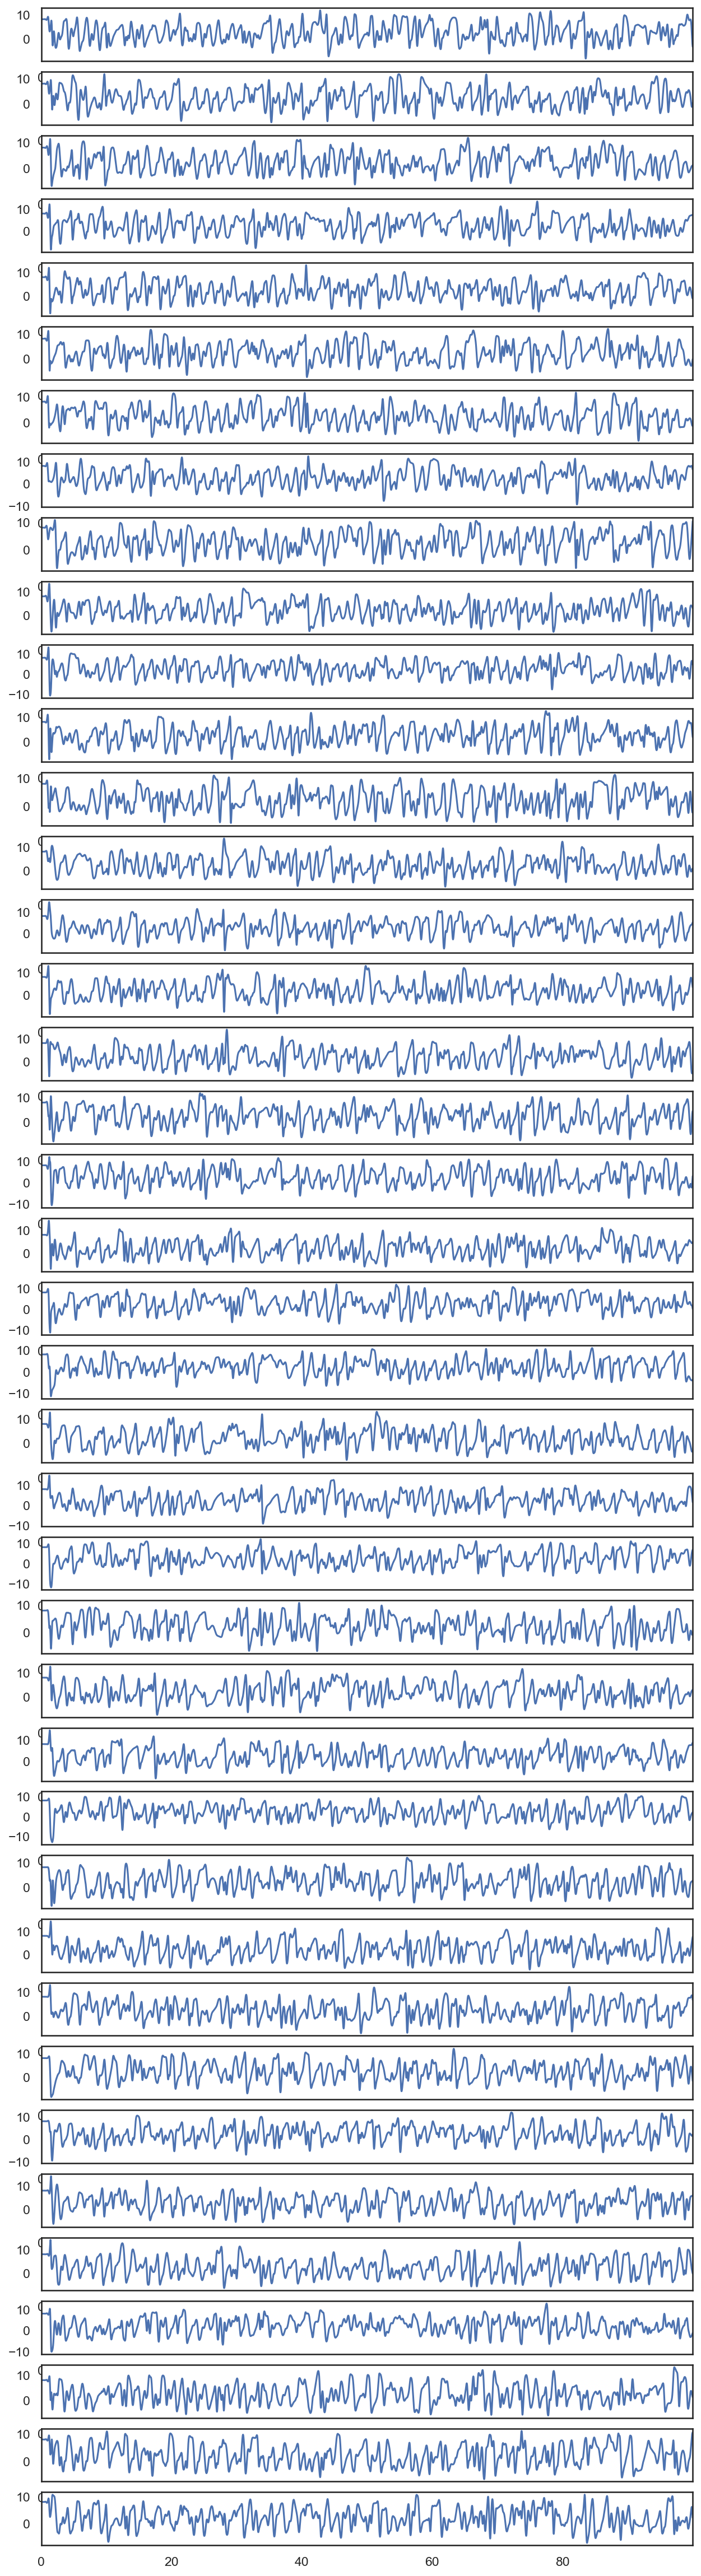

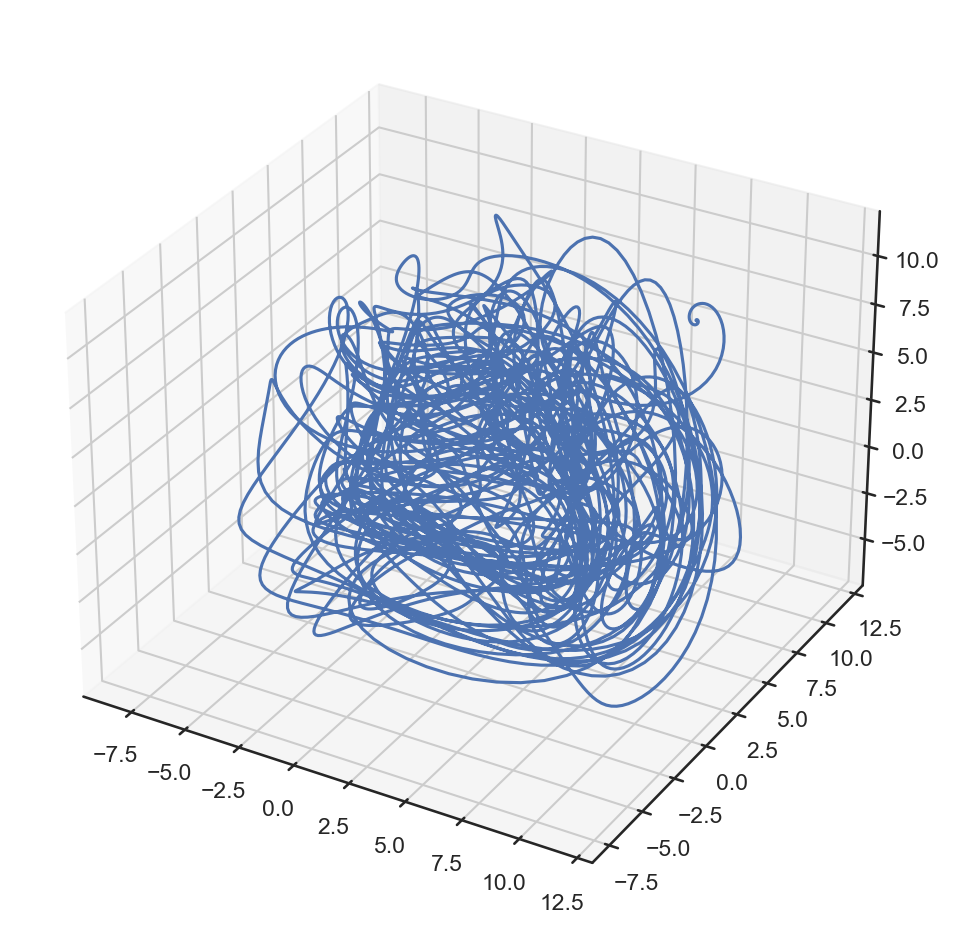

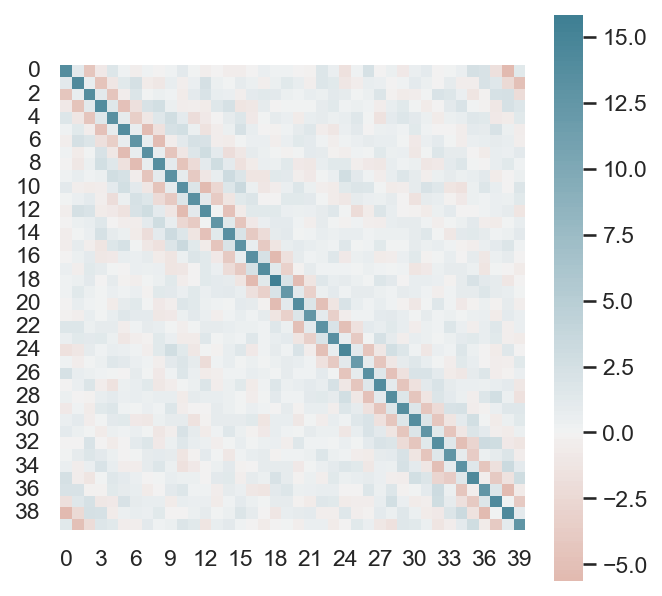

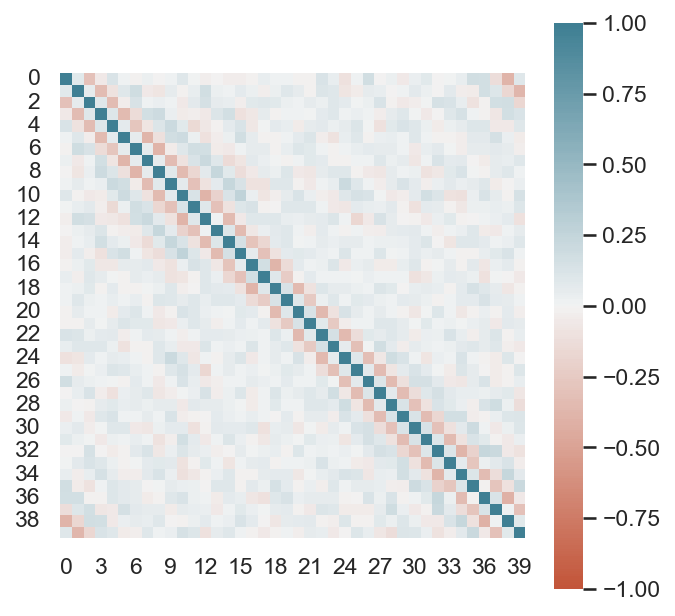

In [138]:
# Lorenz 1996

# Number of variables.
M = 40
# Constants.
F = 8.

# Initial conditions.
x_0 = np.array( [F] * M )
x_0[0] = x_0[0] + 0.01

# Solve by Runge Kutta 4.
x, t = RK_4(Lorenz_96, x_0)

# Plot
plot_Lorenz(x, t)

# Canadian Quick Covariance method.
Canadian_cov(x)
Canadian_corr(x)